# Tutorial on computational tools for the MECORE database
*Tomasz Klochowicz*

First, let's import the required packages

In [ ]:
import json
#Manipulating databases
import pandas as pd
import numpy as np

#Decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
#Import the tools
from data_cleaning import DataCleaner, AutomaticCleaner, HypothesesFinder, DataExtractor



### DATA CLEANING EXAMPLE

In [ ]:
#Let's read the precleaned data contaiing only semantic properties 
df = pd.read_csv('sem_merged_database.csv')

In [ ]:
df

In [ ]:
#Get an instance of cleaner from the tools
cleaner = DataCleaner()

In [ ]:
#Check if the columns are named correctly
cleaner.check_names(df, semantic_only=True)

In [ ]:
#df_test = df.head(15)
# Check a value of a random point
print(df.iloc[13][13])
#Change the value and include a typo
df.iat[13,13] = 'compatable'
print(df.iloc[13][13])

In [7]:
# Normally you can use cleaner.automatically_remove_typos(df) to remove typos. This always takes some time. 
# But we must ensure that the autocorrect did what we wanted it to do!
# Fix the values which the autocorrect missed/misreplaced

cleaner.fix_column_values(df)

There are 1 cells with value 'compatable' in the column 'counter-certainty', which is not specified for this column.
All values 'compatable' replaced with 'compatible'!


language               predicate    English translation  \
0    catalan                acceptar                 accept   
1    catalan                   negar  deny (specific notes)   
2    catalan                 esperar                   hope   
3    catalan                  pregar                   pray   
4    catalan                preferir                 prefer   
..       ...                     ...                    ...   
697  turkish               merak et-                 wonder   
698  turkish  gör- + nomiN/Alization                    see   
699  turkish      gör- + diye clause                    see   
700  turkish                 umursa-                   care   
701  turkish                 kanıtla                  prove   

             predicate class              veridicality  \
0                 assessment                 veridical   
1                 assessment  typically anti-veridical   
2                   bouletic                   neither   
3                   bouletic                   neither   
4                   bouletic                   neither   
..                       ...                       ...   
697               perception                       NaN   
698  predicates of relevance       typically veridical   
699  predicates of relevance                   neither   
700             ratification                 veridical   
701                      NaN       typically veridical   

    conjoined with negation conjoined with complement  \
0             contradictory                 redundant   
1                   neither                   neither   
2                   neither                   neither   
3                   neither                   neither   
4                   neither                   neither   
..                      ...                       ...   
697                     NaN                       NaN   
698                 neither                   neither   
699                 neither                   neither   
700           contradictory                   neither   
701                 neither                   neither   

    projection through negation            neg-raising  likelihood  ...  \
0                    projective                      0      always  ...   
1                       neither                      0  compatible  ...   
2                       neither                      0   typically  ...   
3                       neither                      0  compatible  ...   
4                       neither  typically neg-raising  compatible  ...   
..                          ...                    ...         ...  ...   
697                         NaN                    NaN         NaN  ...   
698        typically projective                      0   typically  ...   
699                     neither                      0   typically  ...   
700                  projective                      0      always  ...   
701        typically projective                      0   typically  ...   

       preference    opposition  indifference focus sensitivity  \
0    incompatible        always  incompatible               1.0   
1      compatible    compatible    compatible               1.0   
2          always  incompatible  incompatible               1.0   
3          always  incompatible  incompatible               1.0   
4          always  incompatible  incompatible               1.0   
..            ...           ...           ...               ...   
697           NaN           NaN           NaN               NaN   
698    compatible    compatible    compatible               1.0   
699    compatible    compatible    compatible               1.0   
700        always  incompatible  incompatible               1.0   
701    compatible    compatible    compatible               1.0   

    gradability wrt decl ignorance/belief wrt int gradability wrt int  \
0              undecided                   belief                   0   
1            

In [8]:
# Check a value of a the point
print(df.iloc[13][13])

compatible


### Decision trees - introduction

In [9]:
#Creating a simple example
simple_database= pd.DataFrame([
                    ['Predicate', 'veridical', 'preferential', 'embedding'],
                    ['Know',        1          ,0               , 'responsive'],
                    ['Be unaware',  1          ,0               , 'responsive'],
                    ['Regret',      1          ,1               , 'anti-rogative'],
                    ['Believe',     0          ,0               , 'anti-rogative'],
                    ['Prefer',      0          ,1               , 'anti-rogative']                 
                 ])
#Create header
simple_database.columns = ['Predicate', 'veridical', 'preferential', 'embedding']
simple_database = simple_database[1:]
simple_database

Predicate veridical preferential      embedding
1        Know         1            0     responsive
2  Be unaware         1            0     responsive
3      Regret         1            1  anti-rogative
4     Believe         0            0  anti-rogative
5      Prefer         0            1  anti-rogative

In [10]:
#Create a tree model
tree = DecisionTreeClassifier()
# Take your target variable (the column you want to extract decision rules for e.g. 'embedding')
y = simple_database['embedding']
#Take the columns containing the properties. Drop all the 'index' columns e.g. 'predicate' and the target column. 
X = simple_database.drop(['Predicate', 'embedding'], axis=1)
# Train the model on the data:
model = tree.fit(X,y)

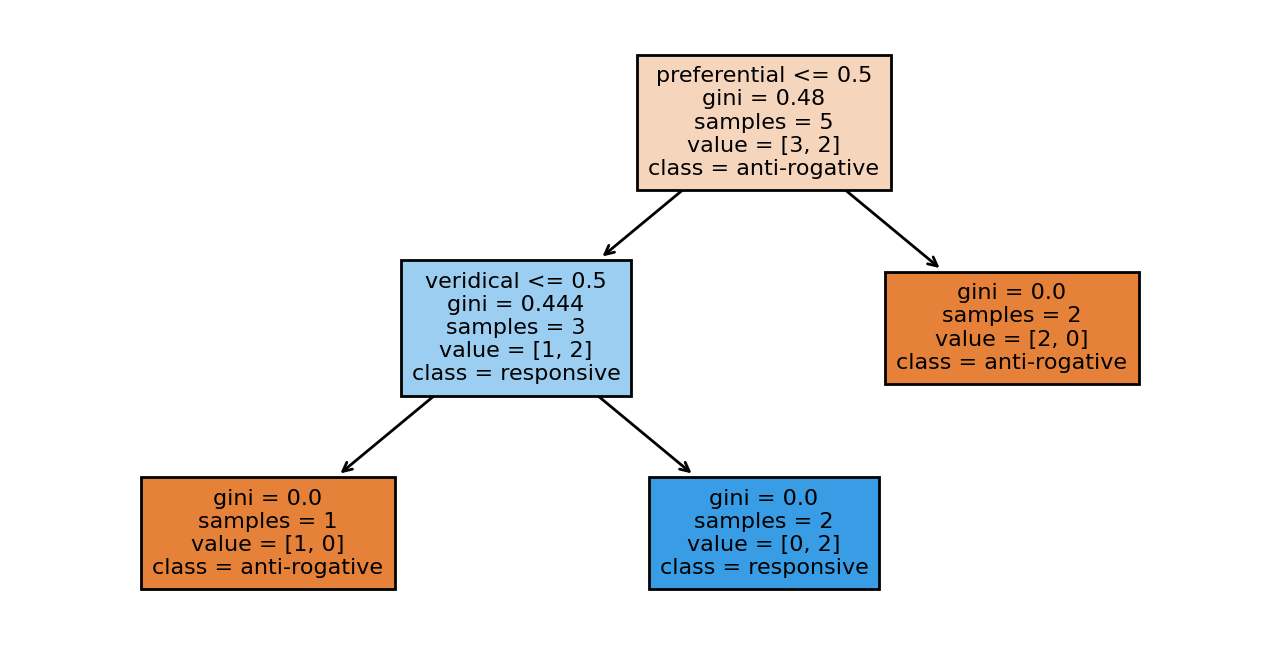

In [11]:
#Let's print the tree resulting from fitting the model
plt.figure(figsize=(8,4), dpi=200)
plot_tree(model, feature_names=X.columns, filled=True, fontsize=8, class_names=["anti-rogative", "responsive"]);

We can see that the tree can correctly classify our predicates. First it observes that all preferential predicates are anti-rogative (right node) and then it is left with non-preferntial predicates. It observes that only veridical predicates are responsive (left->right node) whilenon-veridical (left->left node) are anti-rogative.

Let's see what change if we replace *prefer* with *be happy*

In [12]:
#Creating a simple example
simple_database= pd.DataFrame([
                    ['Predicate', 'veridical', 'preferential', 'embedding'],
                    ['Know',        1          ,0               , 'responsive'],
                    ['Be unaware',  1          ,0               , 'responsive'],
                    ['Regret',      1          ,1               , 'anti-rogative'],
                    ['Believe',     0          ,0               , 'anti-rogative'],
                    ['Be happy',    1          ,1               , 'responsive']                    
                 ])
#Create header
simple_database.columns = ['Predicate', 'veridical', 'preferential', 'embedding']
simple_database = simple_database[1:]
simple_database

Predicate veridical preferential      embedding
1        Know         1            0     responsive
2  Be unaware         1            0     responsive
3      Regret         1            1  anti-rogative
4     Believe         0            0  anti-rogative
5    Be happy         1            1     responsive

In [13]:
#Create a tree model
tree = DecisionTreeClassifier()
# Take your target variable (the column you want to extract decision rules for e.g. 'embedding')
y = simple_database['embedding']
#Take the columns containing the properties. Drop all the 'index' columns e.g. 'predicate' and the target column. 
X = simple_database.drop(['Predicate', 'embedding'], axis=1)
# Train the model on the data:
model = tree.fit(X,y)

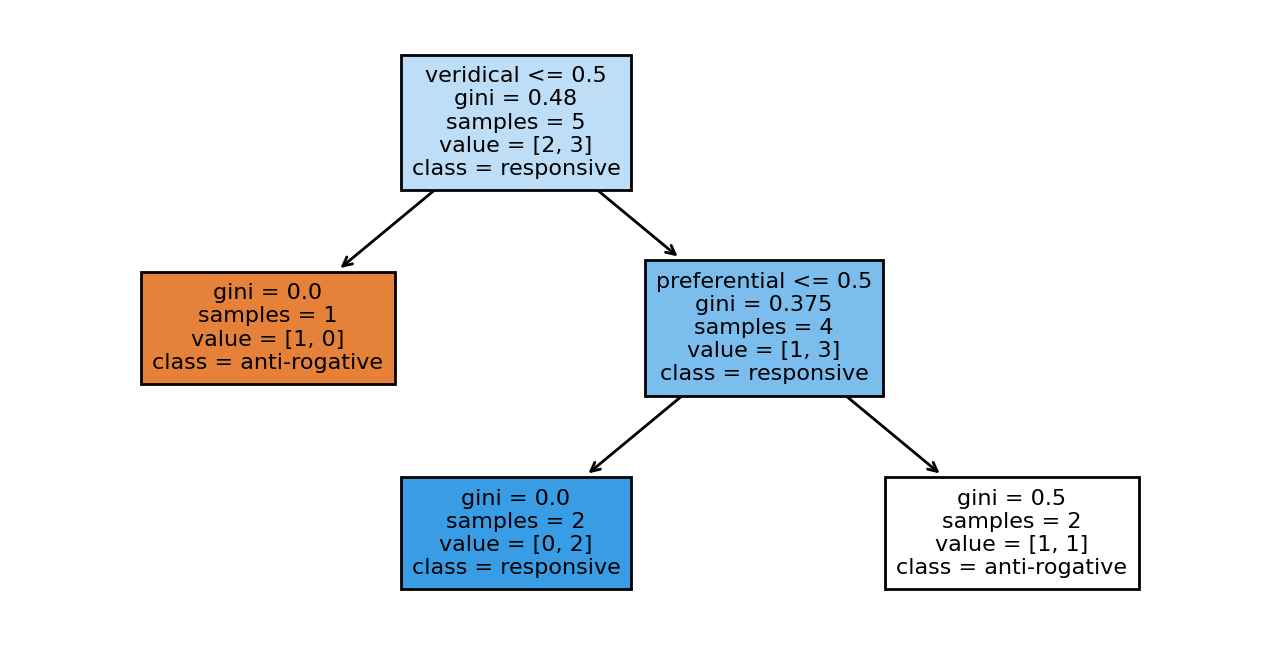

In [14]:
#Let's print the tree resulting from fitting the model
plt.figure(figsize=(8,4), dpi=200)
plot_tree(model, feature_names=X.columns, filled=True, fontsize=8, class_names=["anti-rogative", "responsive"]);

### Extract rules from decision trees

In [ ]:
#Get an instance of a finder
finder = HypothesesFinder()
#Retreive branches as text 
finder.retreive_text_branches(tree,X,y)

[[('veridical', '1'), ('preferential', '0'), ('responsive', 2)],
 [('veridical', '0'), ('anti-rogative', 1)]]

We found two generalisations, correpsonding to two branches of the tree (with pure leaves).
1. [('veridical', '1'), ('preferential', '0'), ('responsive', 2)]
   - All veridical and **non-**preferential predicates are responsive (2 predicates).
2. [('veridical', '0'), ('anti-rogative', 1)]
    - All non-veridical predicates are anti-rogative.

In [16]:
#Now, let's allow for 1 exception
finder.retreive_text_branches(tree,X,y, exception_size=1)

[[('veridical', '1'),
  ('responsive', 3, 'exceptions: 1'),
  ('preferential', '0'),
  ('responsive', 2, 'exceptions: 0')],
 [('veridical', '0'), ('anti-rogative', 1, 'exceptions: 0')],
 [('veridical', '1'),
  ('responsive', 3, 'exceptions: 1'),
  ('preferential', '1'),
  ('anti-rogative', 1, 'exceptions: 1')]]

### Decision trees - real data
Now, let's try to work with real data and verify or falsify the veridicality hypothesis. 

In [17]:
#Let's extract semanic data from the whole database.
#Let's get an instance of an extractor
extractor= DataExtractor()
#Note that the next call relies on the naming of columns in the mecore database. If you want to apply to different data you need to perform this step manually.
sem = extractor.get_semantic_mecore(df)
y= sem['label']

responsive       411
anti-rogative    208
Name: label, dtype: int64


In [18]:
#First let's try a brute force alghoritm which will check the veridicality hypothesis:
# Hintikka (1975), Ginzburg (1995), Lahiri (2002), Egre 2008
finder.conjunctive_check(sem, y, ['veridicality'])
#Keeping track of exceptions here is computationally infeasible.

This conjunction does not yield any hypotheses


[]

Let's see an example of how we can get more information about a hypothesis using a tree:

In [19]:
#Use get_X to get the predictor columns
X = extractor.get_X(sem, cols=['language', 'predicate', 'English translation', 'predicate class'])
# Get the target column
y = sem['label']
#Get values of the column veridicality.
X_ver = X[['veridicality_veridical', 'veridicality_anti-veridical']]

In [20]:
#Fit a decision tree classifier
tree = DecisionTreeClassifier()
tree.fit(X_ver,y)

DecisionTreeClassifier()

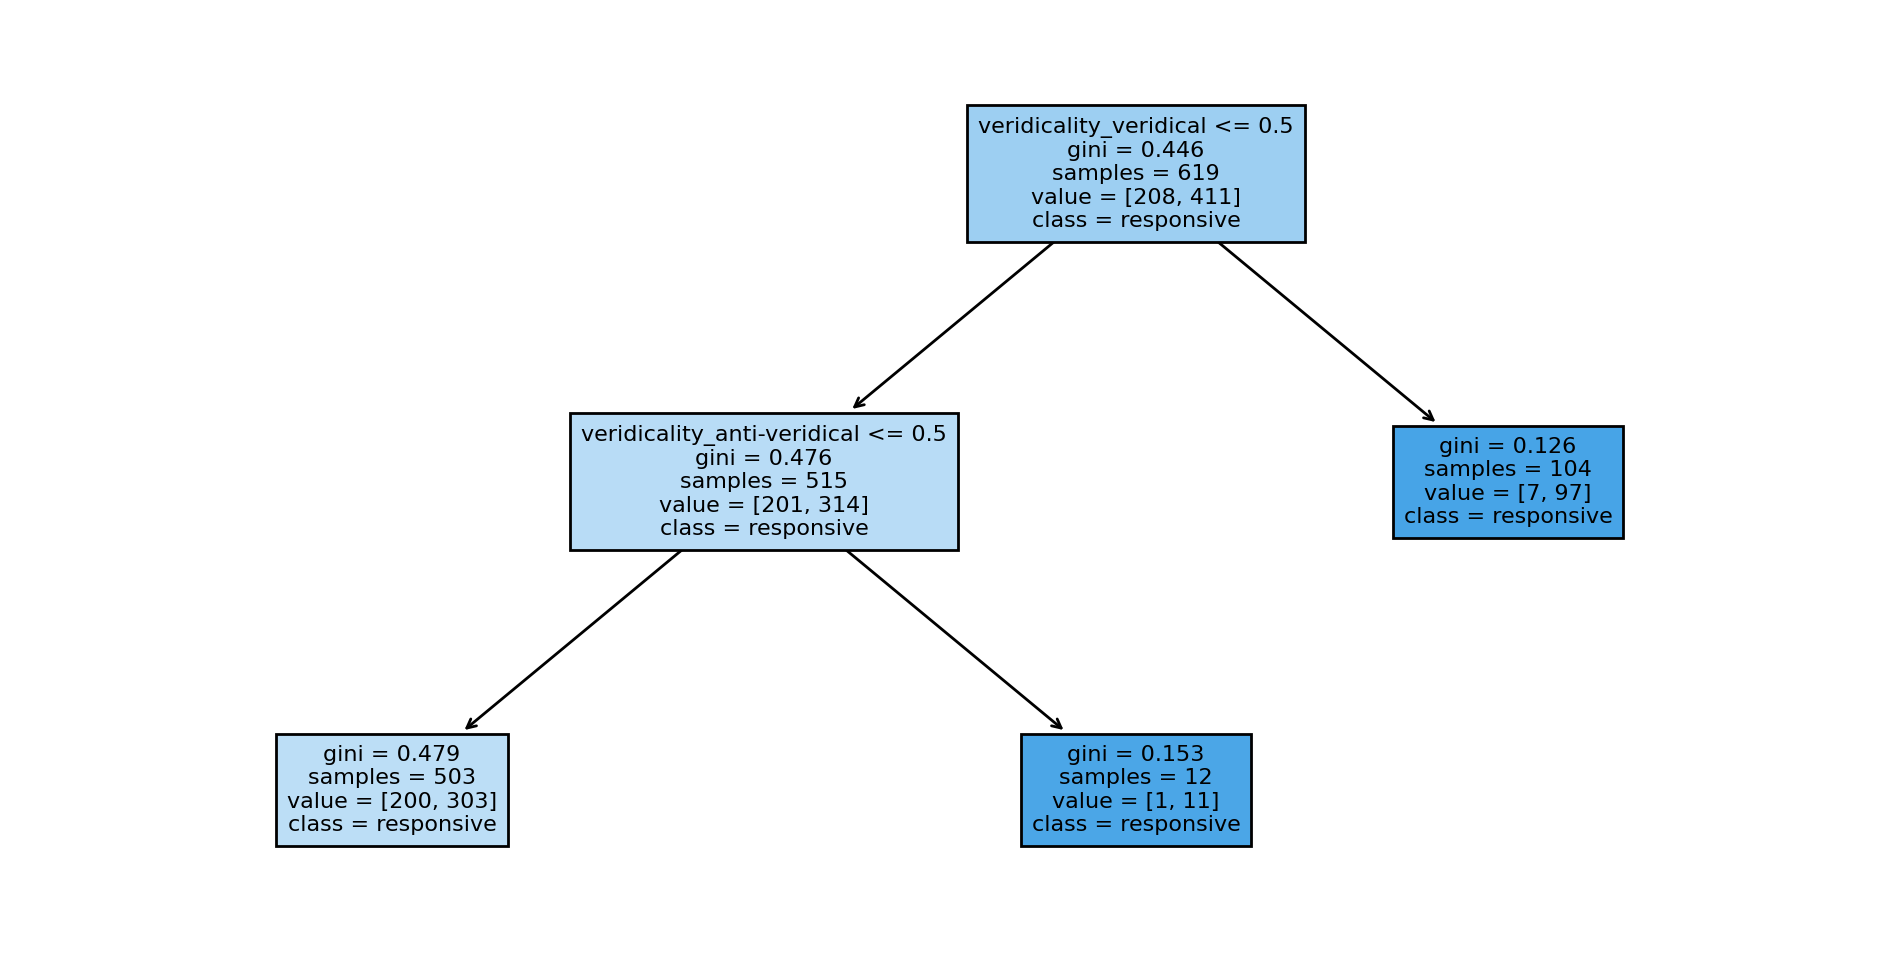

In [21]:
#Plot the tree
#Let's print the tree resulting from fitting the model
#Please note that you need to change the feature_names to X_ver.columns!

plt.figure(figsize=(12,6), dpi=200)
plot_tree(tree, feature_names=X_ver.columns, filled=True, fontsize=8, class_names=["anti-rogative", "responsive"]);

In [22]:
#Use get_X to get the predictor columns
X = extractor.get_X(sem, cols=['language', 'predicate', 'English translation', 'predicate class'])
# Get the target column
y = sem['label']
#Get values of the column veridicality.
columns = extractor.get_binary_column_names(sem,'veridicality')
#Restrict to columns involving veridicality
X_ver = X[columns]

In [23]:
X_ver

veridicality_neither  veridicality_typically veridical  \
0                       0                                 0   
1                       0                                 0   
2                       1                                 0   
3                       1                                 0   
4                       1                                 0   
..                    ...                               ...   
614                     0                                 1   
615                     0                                 1   
616                     0                                 1   
617                     1                                 0   
618                     0                                 0   

     veridicality_veridical  veridicality_anti-veridical  \
0                         1                            0   
1                         0                            0   
2                         0                            0   
3                         0                            0   
4                         0                            0   
..                      ...                          ...   
614                       0                            0   
615                       0                            0   
616                       0                            0   
617                       0                            0   
618                       1                            0   

     veridicality_typically anti-veridical  
0                                        0  
1                                        1  
2                                        0  
3                                        0  
4                                        0  
..                                     ...  
614                                      0  
615                                      0  
616                                      0  
617                                      0  
618                                      0  

[619 rows x 5 columns]

In [24]:
#Fit a decision tree classifier
tree = DecisionTreeClassifier()
tree.fit(X_ver,y)


DecisionTreeClassifier()

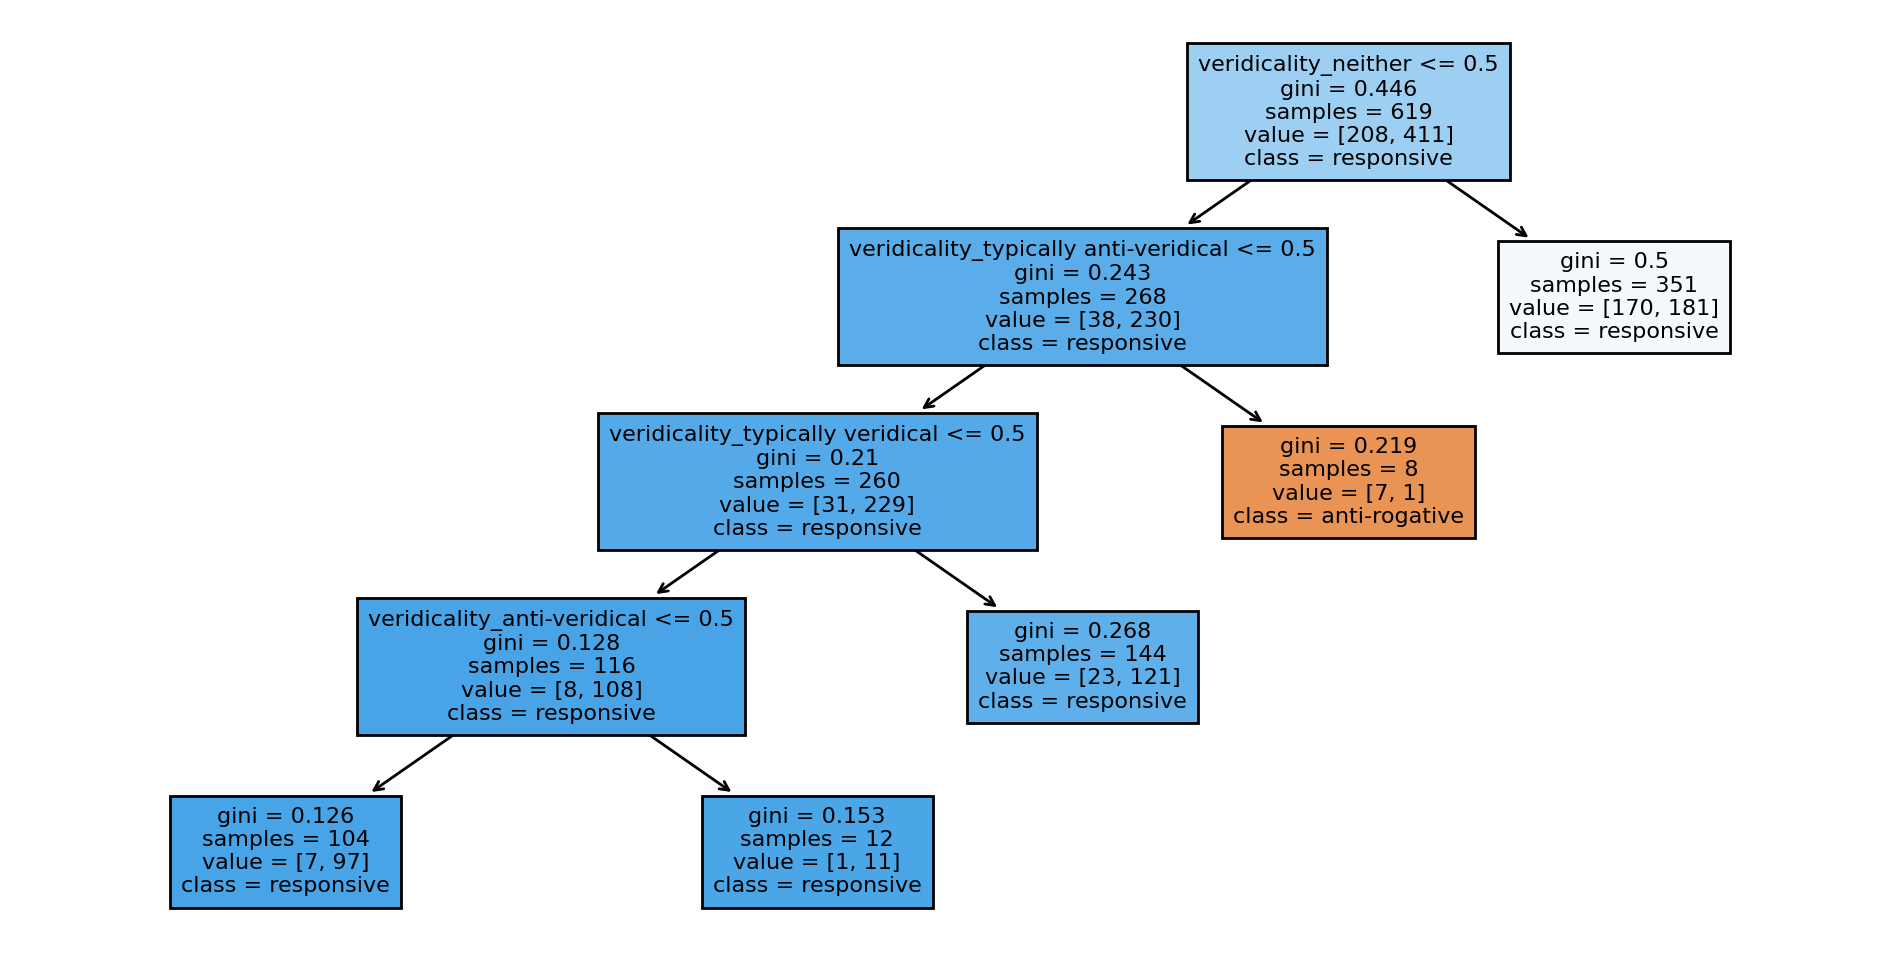

In [25]:
#Plot the tree
#Let's print the tree resulting from fitting the model
#Please note that you need to change the feature_names to X_ver.columns!

plt.figure(figsize=(12,6), dpi=200)
plot_tree(tree, feature_names=X_ver.columns, filled=True, fontsize=8, class_names=["anti-rogative", "responsive"]);

Observe that the trees from the entire database are a bit more difficult to read. In particular, the top node corresponds to the property 'neither veridical nor anti-veridical'. Therefore the node to the right contains the predicates which satisfy it and the right node the other predicates (e.g. veridical, anti-veridical) 

This tree is also a good example of the problem with the roots of the trees. They are included in every single hypothesis. This may cause an honest generalisation to hide in a branch. Let's prune the root. 

In [26]:
#Prune the root
X_ver = X_ver.drop('veridicality_neither', axis=1)
X_ver

veridicality_typically veridical  veridicality_veridical  \
0                                   0                       1   
1                                   0                       0   
2                                   0                       0   
3                                   0                       0   
4                                   0                       0   
..                                ...                     ...   
614                                 1                       0   
615                                 1                       0   
616                                 1                       0   
617                                 0                       0   
618                                 0                       1   

     veridicality_anti-veridical  veridicality_typically anti-veridical  
0                              0                                      0  
1                              0                                      1  
2                              0                                      0  
3                              0                                      0  
4                              0                                      0  
..                           ...                                    ...  
614                            0                                      0  
615                            0                                      0  
616                            0                                      0  
617                            0                                      0  
618                            0                                      0  

[619 rows x 4 columns]

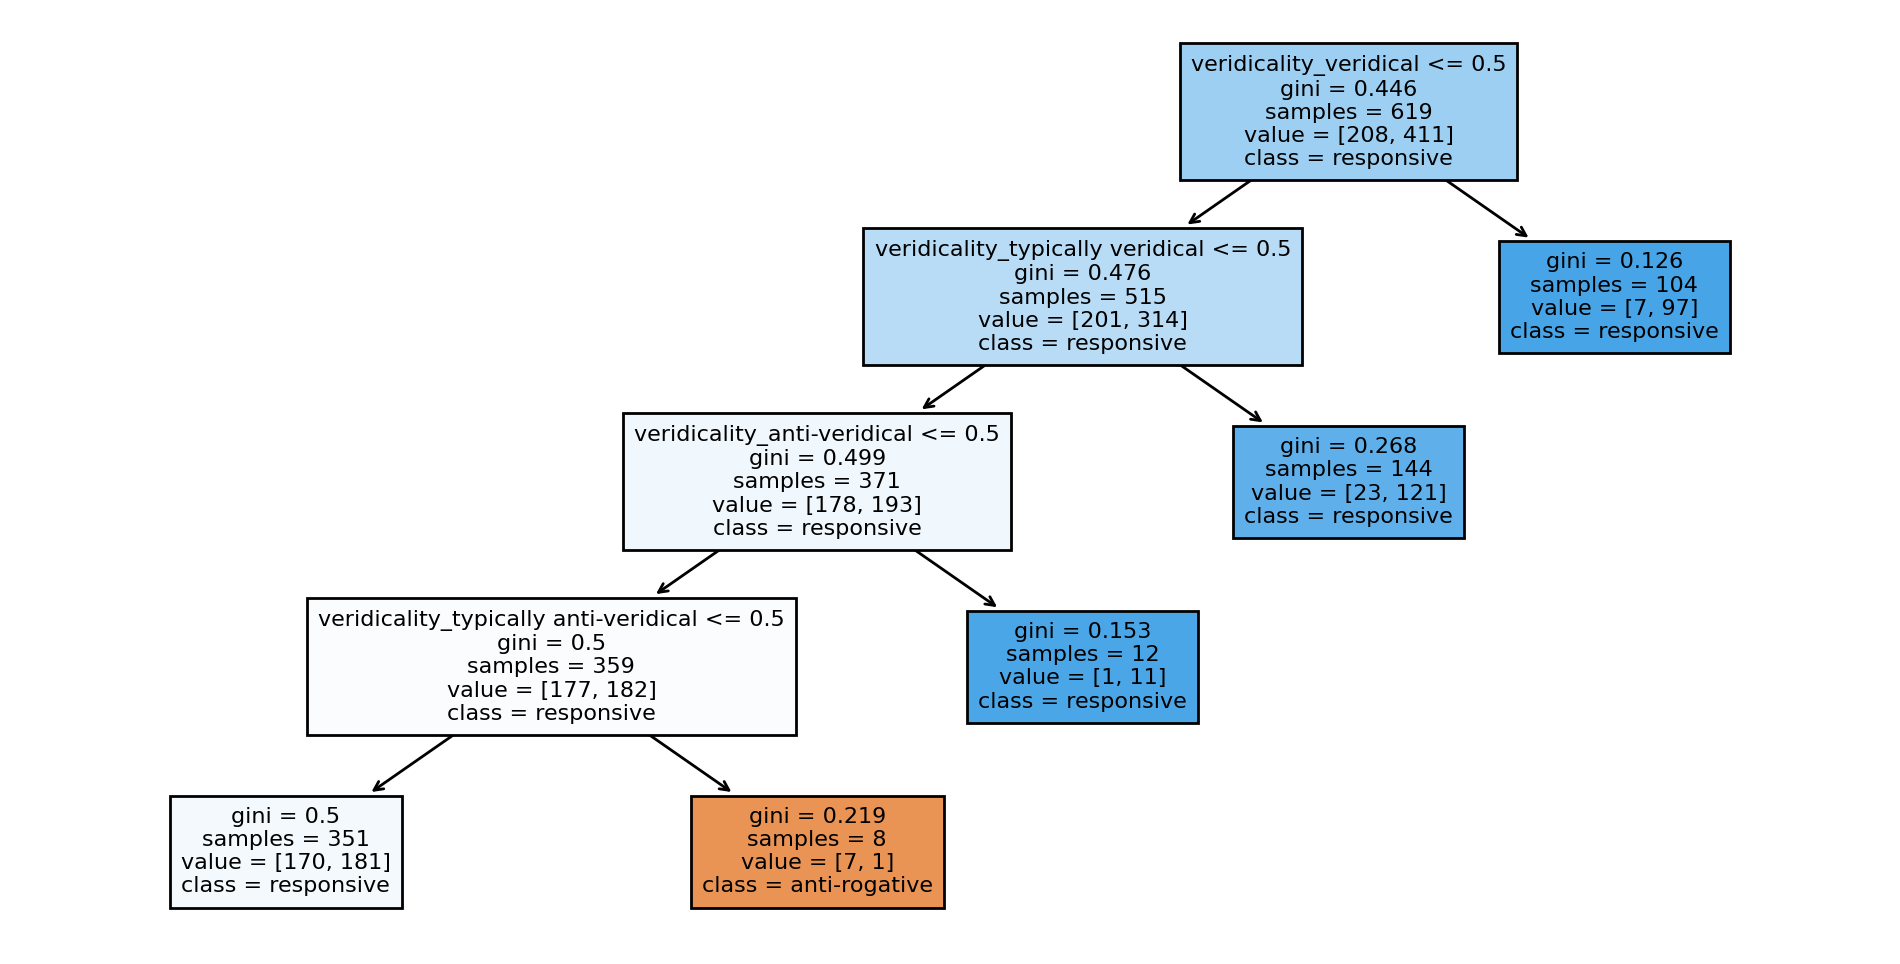

In [27]:
#Fit a decision tree classifier
tree = DecisionTreeClassifier()
tree.fit(X_ver,y)
plt.figure(figsize=(12,6), dpi=200)
plot_tree(tree, feature_names=X_ver.columns, filled=True, fontsize=8, class_names=["anti-rogative", "responsive"]);

In [28]:
#If we do not allow for exceptions we will not find any generalisations
finder.retreive_text_branches(tree,X,y)

[]

In [29]:
#Now, let's allow for 10 exceptions (result of simualtion with random databases)
finder.retreive_text_branches(tree,X,y, exception_size=10)

[[('veridicality_anti-veridical', '1'), ('responsive', 97, 'exceptions: 7')],
 [('veridicality_anti-veridical', '0'),
  ('focus sensitivity', '0'),
  ('veridicality_neither', '1'),
  ('responsive', 11, 'exceptions: 1')],
 [('veridicality_anti-veridical', '0'),
  ('focus sensitivity', '0'),
  ('veridicality_neither', '0'),
  ('veridicality_typically anti-veridical', '1'),
  ('anti-rogative', 7, 'exceptions: 1')]]

### Excercise  
Retrace these steps and try to verify the hypothesis from Uegaki & Sudo (2021):
*All non-veridical and (positively) preferential predicates are anti-rogative*

Hint: You will need to use the 'veridicality' column again as well as the 'preference column'. 

# Hypothesis discovery

Now that we know a bit about trees we can finally proceed to the hypothesis discovery algorithm. 
First let's make sure that we load the correct data. 

In [ ]:
# Load the data
#Let's read the precleaned data contaiing only semantic properties 
df = pd.read_csv('sem_merged_database.csv')
sem = extractor.get_semantic_mecore(df)

responsive       411
anti-rogative    208
Name: label, dtype: int64


Let's try to construct a decision tree of the entire database

In [ ]:
X = extractor.get_X(sem, cols=['language', 'predicate', 'English translation', 'predicate class'])
y = sem['label']
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

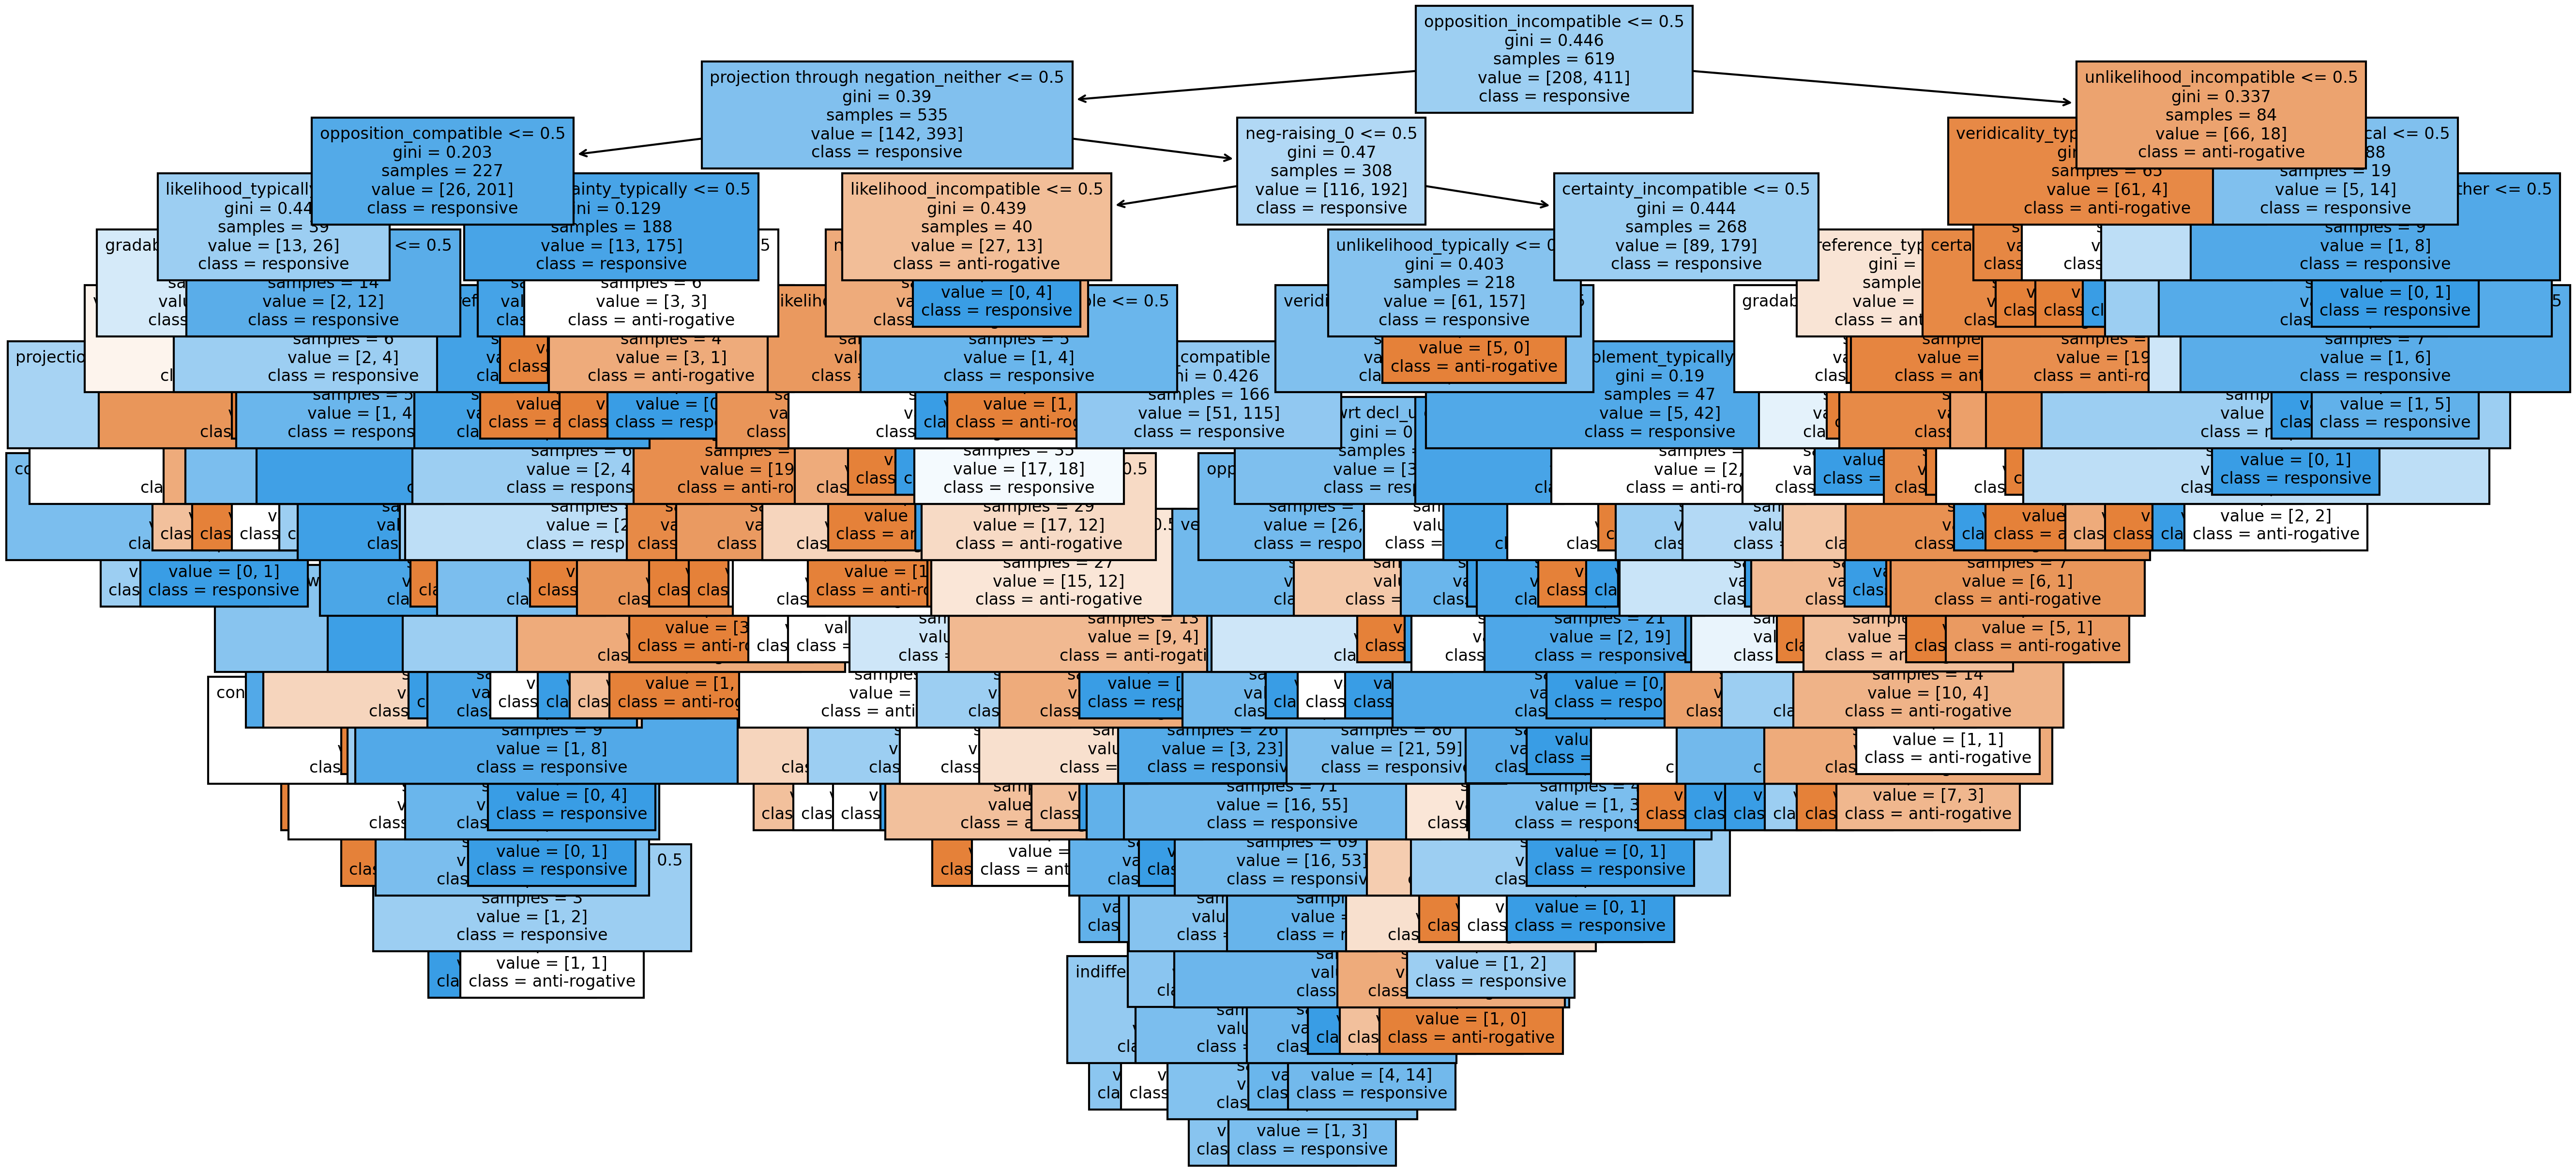

In [32]:
#It takes some time but let's try to generate the tree of the whole database
plt.figure(figsize=(20,10), dpi=300)
plot_tree(model, feature_names=X.columns, filled=True, fontsize=8, class_names=["anti-rogative", "responsive"]);

We can see that on there is not much we can say about it. However note that we have incompatibility with opposition at the root which suggests that positive preferentiality explains a lot of variance in the data.

We tune the parameters of a tree to split at most 4 times. 

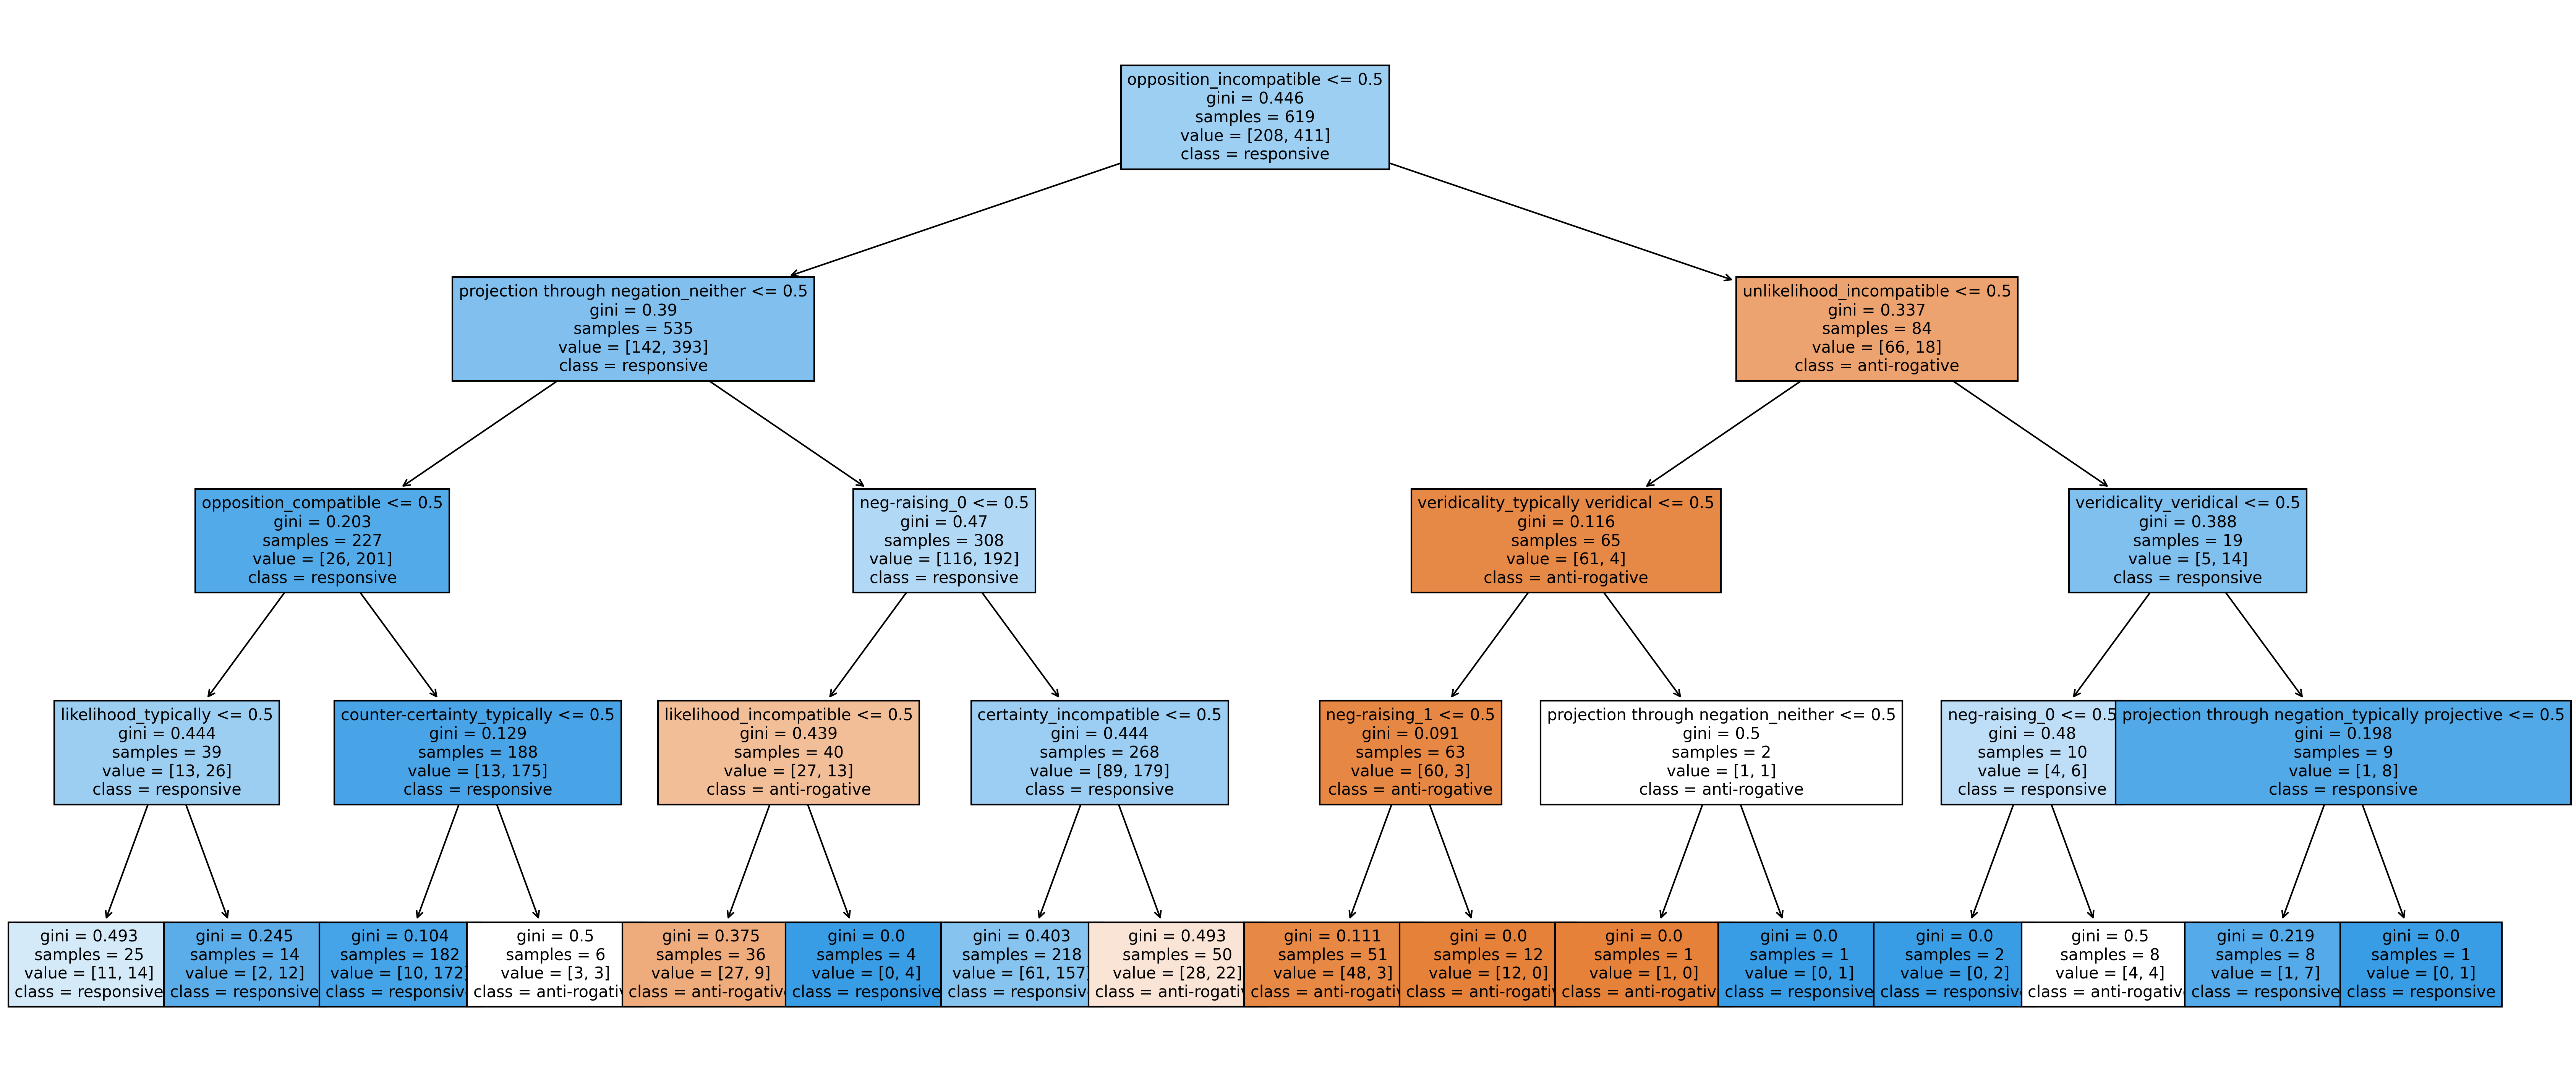

In [33]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X,y)
plt.figure(figsize=(28,12), dpi=300)
plot_tree(model, feature_names=X.columns, filled=True, fontsize=10, class_names=["anti-rogative", "responsive"]);

We can already notice that at the second level there is a node containing 61 anti-rogative predicates and only 4 responsive (right ->left). This node corresponds to preferential predicates which are neutral with respect to likelihood (see my talk for details). We can also extract those in textual form and sort. 

In [34]:
#Let's extract branches from that tree and see the interesting hypotheses. 
finder.retreive_text_branches(model, X,y, exception_size=5, exception_indexes=True)

[[('opposition_incompatible', '1'),
  ('unlikelihood_incompatible', '1'),
  ('responsive',
   14,
   'exceptions: 5',
   'exception_indexes: [120, 268, 276, 329, 436]'),
  ('veridicality_veridical', '0'),
  ('responsive',
   6,
   'exceptions: 4',
   'exception_indexes: [120, 268, 329, 436]'),
  ('neg-raising_0', '1'),
  ('anti-rogative',
   4,
   'exceptions: 4',
   'exception_indexes: [241, 360, 397, 569]')],
 [('opposition_incompatible', '0'),
  ('projection through negation_neither', '0'),
  ('opposition_compatible', '1'),
  ('counter-certainty_typically', '1'),
  ('anti-rogative', 3, 'exceptions: 3', 'exception_indexes: [205, 273, 369]')],
 [('opposition_incompatible', '1'),
  ('unlikelihood_incompatible', '0'),
  ('anti-rogative',
   61,
   'exceptions: 4',
   'exception_indexes: [195, 208, 401, 578]'),
  ('veridicality_typically veridical', '0'),
  ('anti-rogative', 60, 'exceptions: 3', 'exception_indexes: [195, 208, 578]'),
  ('neg-raising_1', '0'),
  ('anti-rogative',
   48,
 

In [35]:
#This will return the purest hypotheses number of exceptions/ number of predicates. 
finder.sort_hyp(finder.retreive_text_branches(model, X,y, exception_size=5, exception_indexes=True),  'ratio')

[[('opposition_incompatible', '0'),
  ('projection through negation_neither', '1'),
  ('neg-raising_0', '0'),
  ('likelihood_incompatible', '1'),
  ('responsive', 4, 'exceptions: 0', 'exception_indexes: []')],
 [('opposition_incompatible', '1'),
  ('unlikelihood_incompatible', '0'),
  ('anti-rogative',
   61,
   'exceptions: 4',
   'exception_indexes: [195, 208, 401, 578]'),
  ('veridicality_typically veridical', '0'),
  ('anti-rogative', 60, 'exceptions: 3', 'exception_indexes: [195, 208, 578]'),
  ('neg-raising_1', '1'),
  ('anti-rogative', 12, 'exceptions: 0', 'exception_indexes: []')],
 [('opposition_incompatible', '1'),
  ('unlikelihood_incompatible', '0'),
  ('anti-rogative',
   61,
   'exceptions: 4',
   'exception_indexes: [195, 208, 401, 578]'),
  ('veridicality_typically veridical', '1'),
  ('anti-rogative', 1, 'exceptions: 1', 'exception_indexes: [401]'),
  ('projection through negation_neither', '0'),
  ('anti-rogative', 1, 'exceptions: 0', 'exception_indexes: []')],
 [('op

We can see that in both sortings the preferential predicates which are neutral with respect to likelihood hypothesis is high.

We can also notice that all the extracted hypotheses start with ('opposition_incompatible', '0') or ('opposition_incompatible', '1') this is again a problem with the unique root. Let's get rid of thr root and see what changes. 

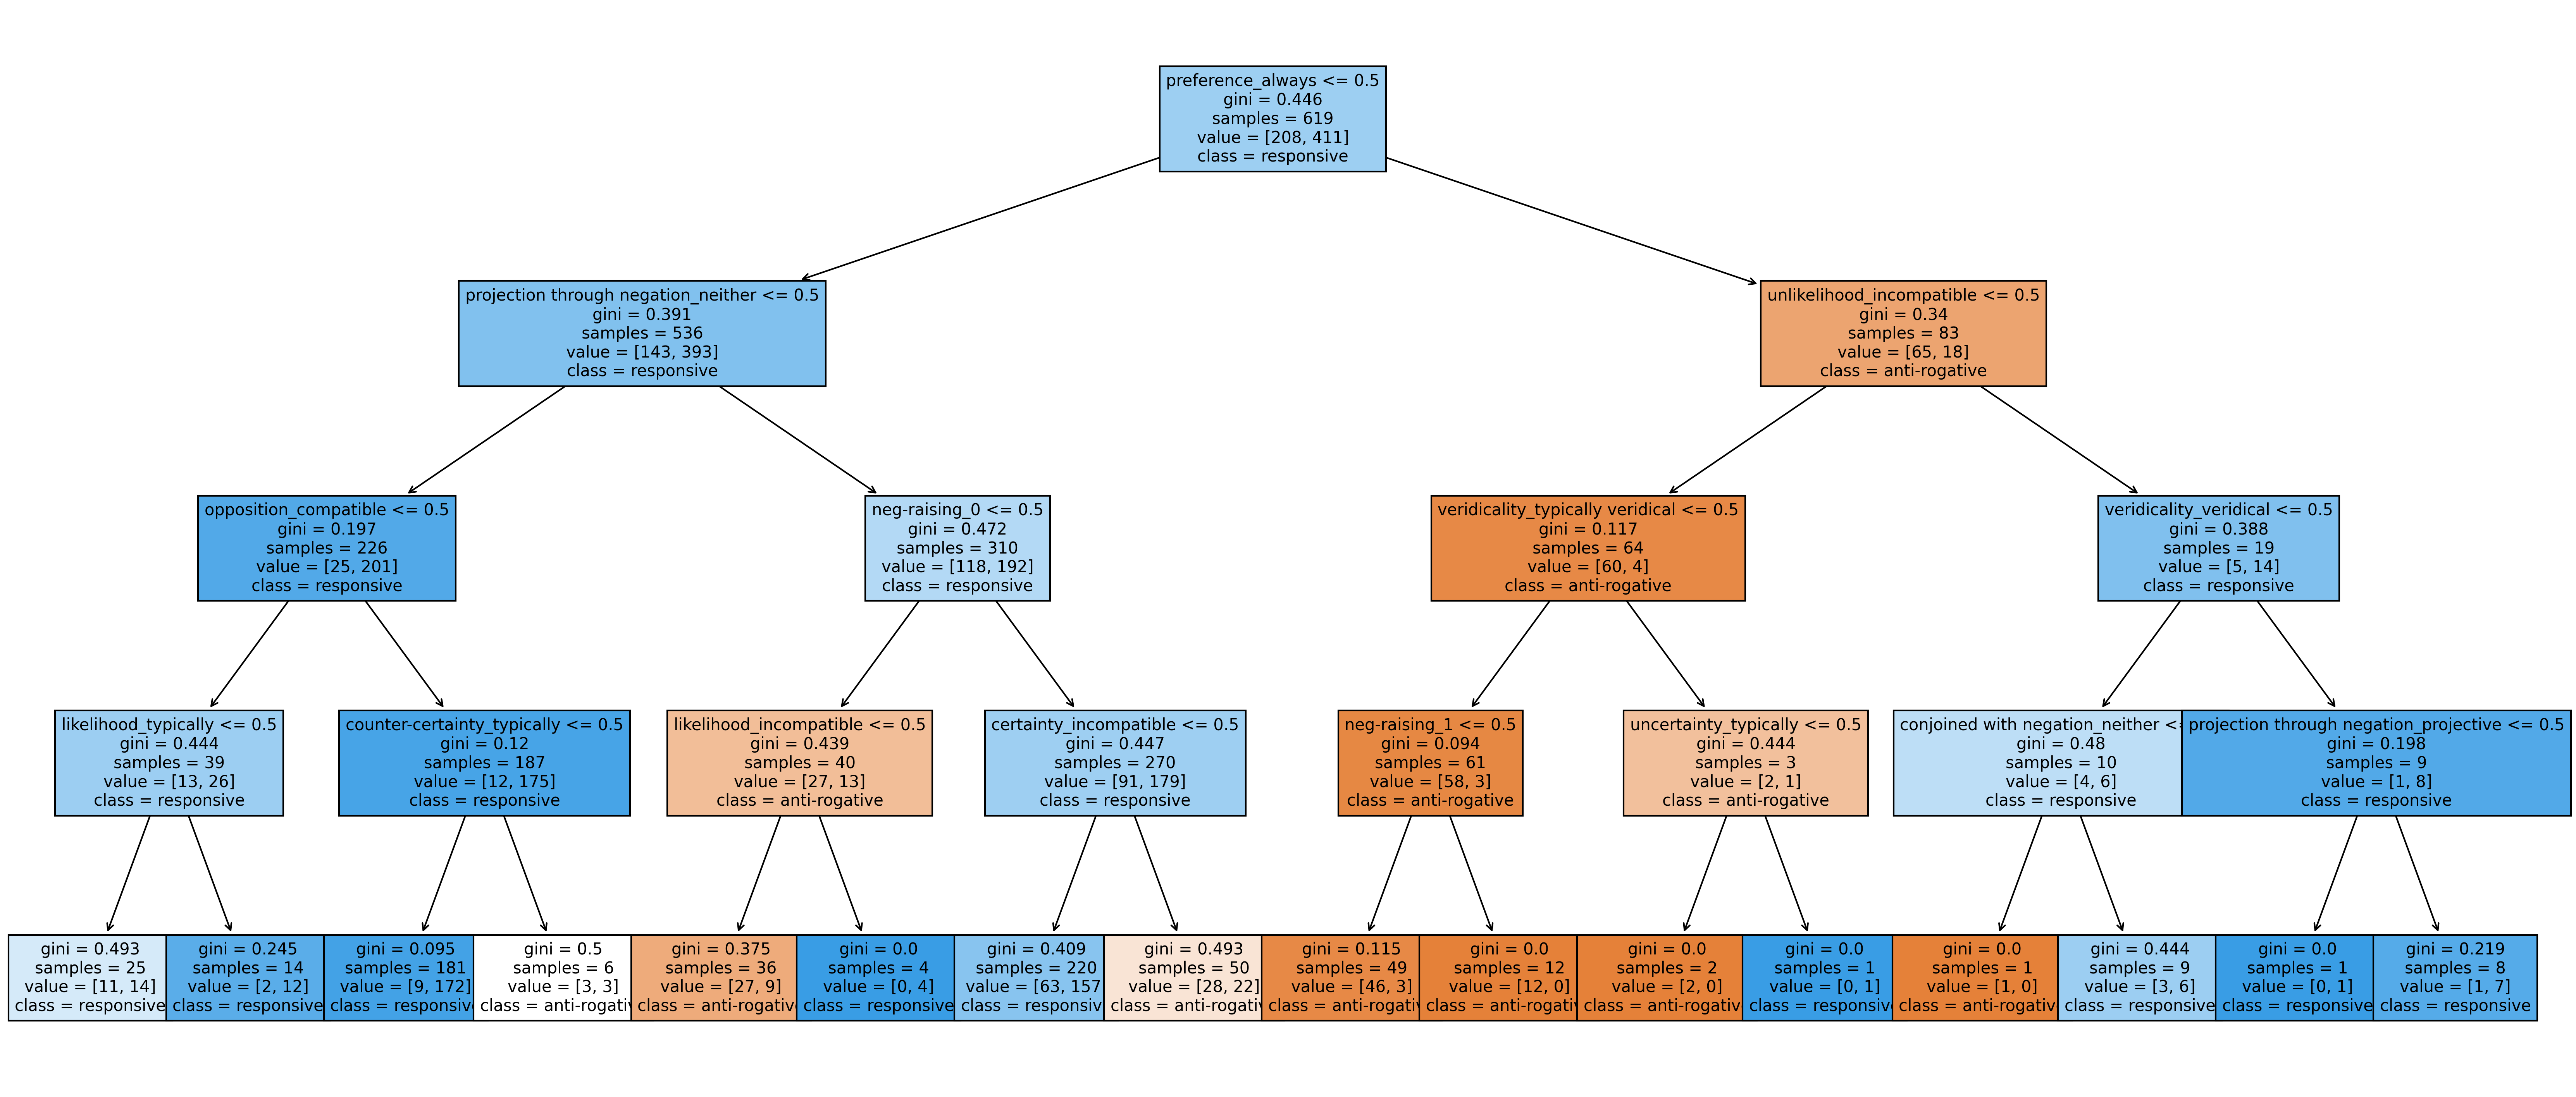

In [37]:
X_limited = X.drop('opposition_incompatible', axis=1)
model_2 = DecisionTreeClassifier(max_depth=4)
model_2.fit(X_limited,y)
plt.figure(figsize=(28,12), dpi=300)
plot_tree(model_2, feature_names=X_limited.columns, filled=True, fontsize=10, class_names=["anti-rogative", "responsive"]);

We can observe that nothing much have change it is because if a predicate is allways positively preferential it is incomatible with opposition. In fact these are properties denoting almost the same set of predicates.

In [ ]:
#sem[(sem['opposition'] == 'incompatible') & (sem['preference'] != 'always')] 
#sem[(sem['opposition'] != 'incompatible') & (sem['preference'] == 'always')]

We can prune again:

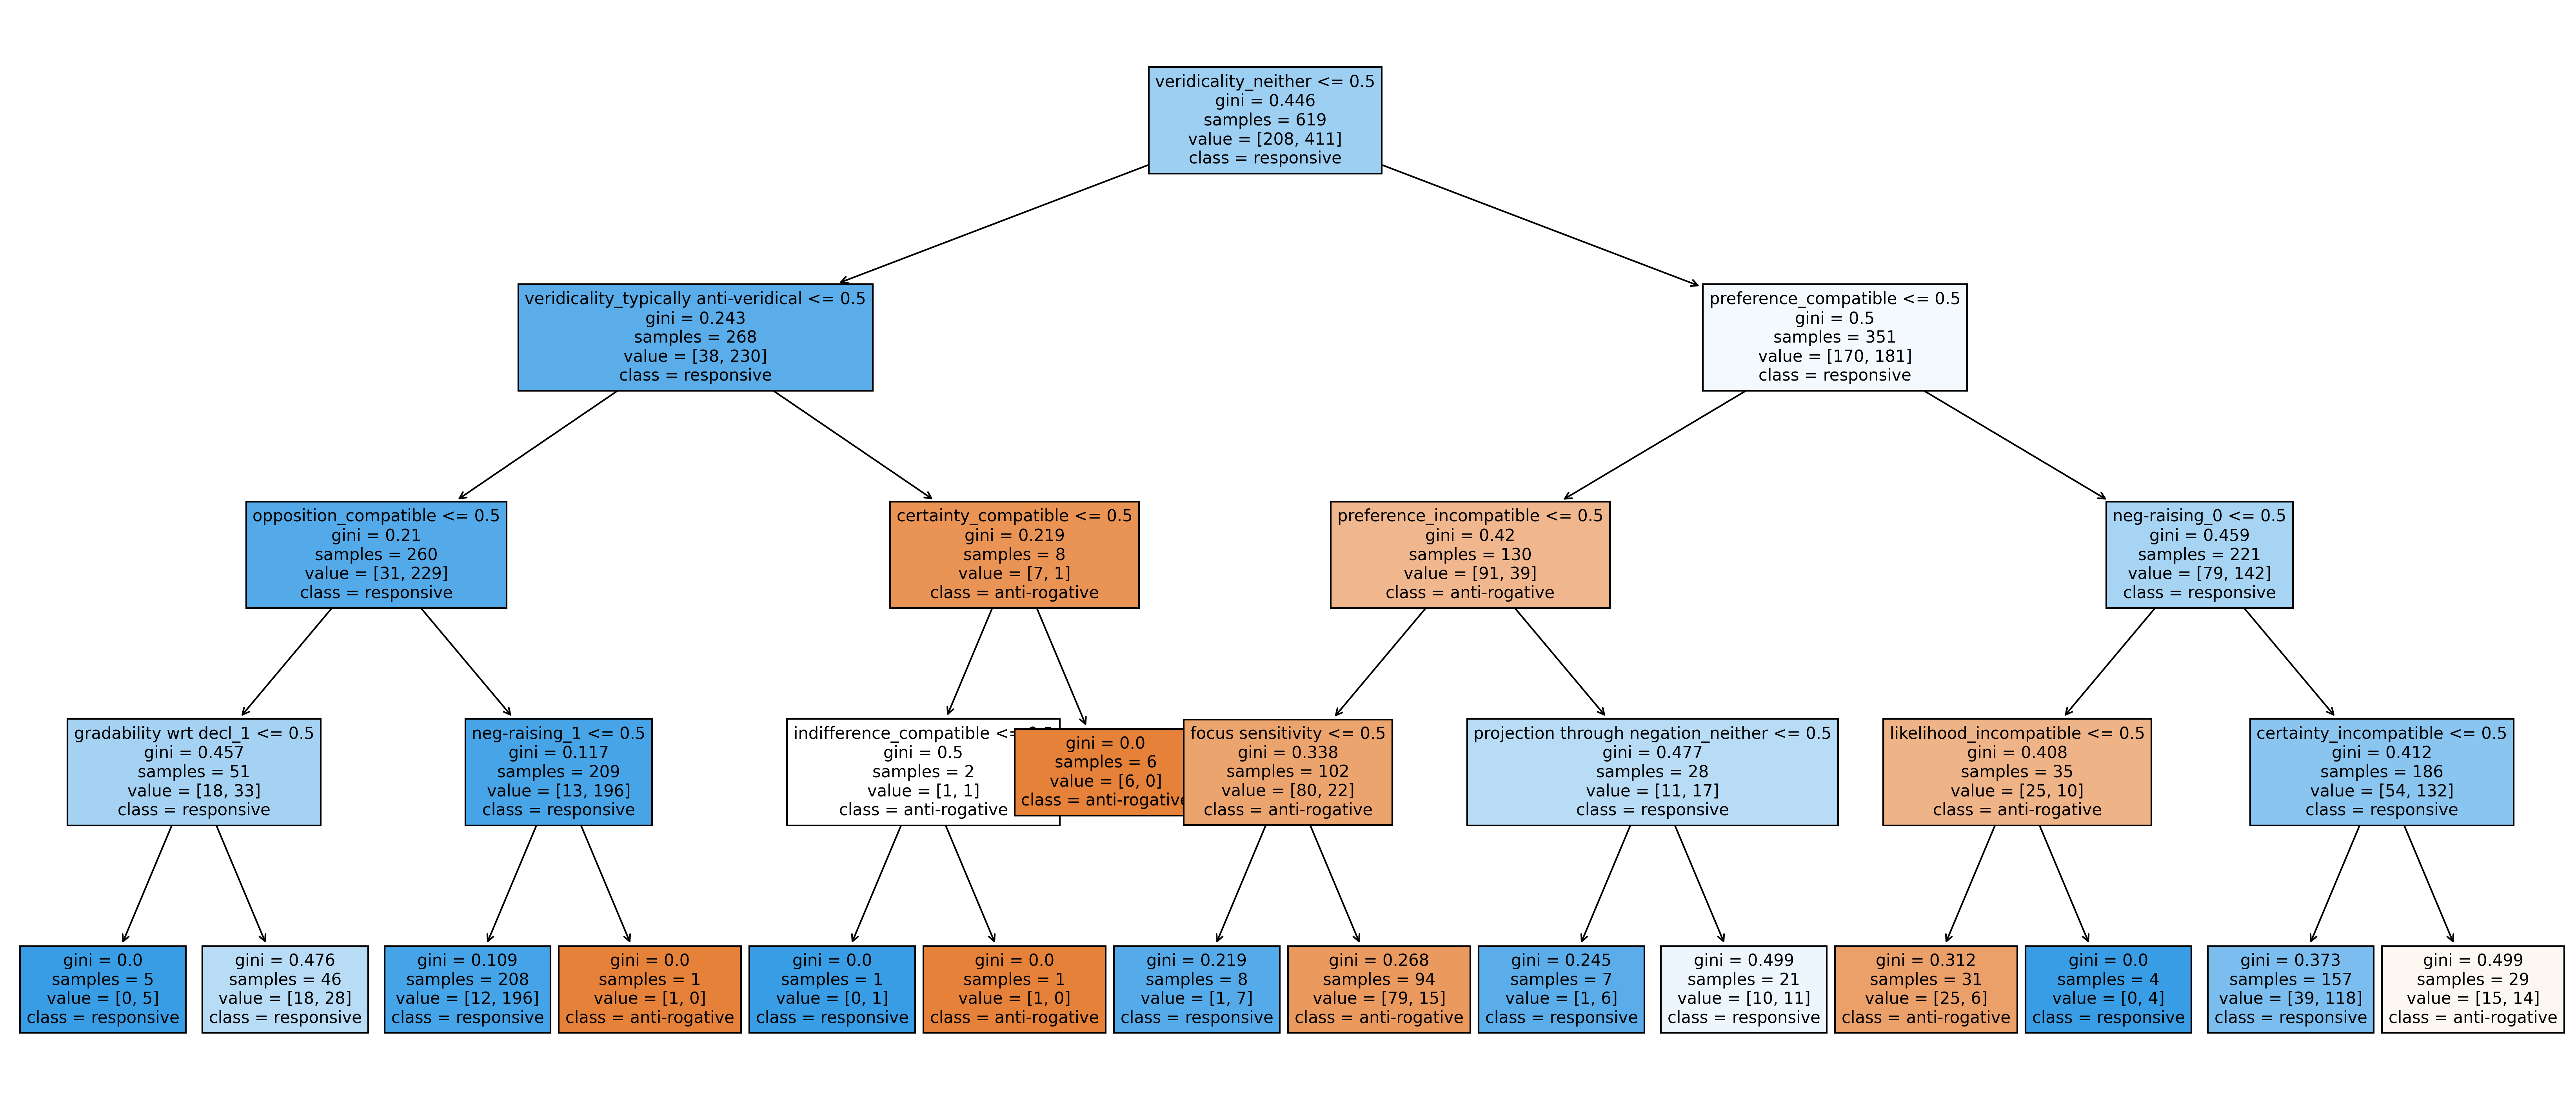

In [38]:
X_limited = X_limited.drop('preference_always', axis=1)
model_3 = DecisionTreeClassifier(max_depth=4)
model_3.fit(X_limited,y)
plt.figure(figsize=(28,12), dpi=300)
plot_tree(model_3, feature_names=X_limited.columns, filled=True, fontsize=10, class_names=["anti-rogative", "responsive"]);

Observe that we can repeat this procedure until we exhaust the set of properties. This can be done very quickly and it will give us a big set of hypotheses to look at.  

In [39]:
h = finder.pruning_based_discovery(sem,X,y, exception_size=10, exception_indexes=True)
h

[[('opposition_incompatible', '0'),
  ('projection through negation_neither', '0'),
  ('opposition_compatible', '1'),
  ('counter-certainty_typically', '0'),
  ('responsive',
   172,
   'exceptions: 10',
   'exception_indexes: [97, 113, 115, 121, 154, 155, 282, 437, 597, 607]')],
 [('preference_always', '0'),
  ('projection through negation_neither', '0'),
  ('opposition_compatible', '1'),
  ('counter-certainty_typically', '0'),
  ('responsive',
   172,
   'exceptions: 9',
   'exception_indexes: [97, 113, 115, 121, 154, 155, 282, 437, 607]')],
 [('projection through negation_neither', '0'),
  ('opposition_compatible', '1'),
  ('counter-certainty_typically', '0'),
  ('responsive',
   172,
   'exceptions: 10',
   'exception_indexes: [97, 113, 115, 121, 154, 155, 282, 437, 597, 607]'),
  ('neg-raising_1', '0'),
  ('responsive',
   172,
   'exceptions: 9',
   'exception_indexes: [97, 115, 121, 154, 155, 282, 437, 597, 607]')],
 [('conjoined with negation_neither', '0'),
  ('opposition_alwa

We can also sort the list by ratio of exceptions/predicates


In [40]:
finder.sort_hyp(h, 'min_ratio')

[[('indifference_incompatible', '0'),
  ('conjoined with complement_neither', '0'),
  ('responsive',
   119,
   'exceptions: 7',
   'exception_indexes: [121, 124, 125, 154, 155, 282, 461]'),
  ('veridicality_typically veridical', '0'),
  ('responsive', 85, 'exceptions: 2', 'exception_indexes: [154, 155]'),
  ('neg-raising_undecided', '0'),
  ('responsive', 74, 'exceptions: 0', 'exception_indexes: []'),
  0.0],
 [('preference_compatible', '1'),
  ('neg-raising_0', '1'),
  ('counter-certainty_typically', '0'),
  ('veridicality_veridical', '1'),
  ('responsive', 71, 'exceptions: 0', 'exception_indexes: []'),
  0.0],
 [('veridicality_veridical', '1'),
  ('responsive',
   97,
   'exceptions: 7',
   'exception_indexes: [154, 187, 276, 277, 278, 320, 480]'),
  ('opposition_always', '0'),
  ('responsive', 88, 'exceptions: 2', 'exception_indexes: [154, 276]'),
  ('neg-raising_undecided', '0'),
  ('responsive', 81, 'exceptions: 1', 'exception_indexes: [276]'),
  ('indifference_compatible', '1'),

If we are interested in exceptions to a hypothesis we can easily find them through their indicies. 

In [41]:
sem.iloc[[121, 124, 125, 154, 155, 282, 461]]

language      predicate English translation  \
121   French   être surpris        be surprised   
124   French        prouver               prove   
125   german     akzeptiren              accept   
154   german    recht haben           be right    
155   german  falsch liegen            be wrong   
282  italian      accettare              accept   
461   Polish     rozkazywać               order   

                              predicate class         veridicality  \
121                           emotive factive  typically veridical   
124                              ratification  typically veridical   
125                                assessment  typically veridical   
154  doxastic evaluative / communication verb            veridical   
155                       doxastic evaluative       anti-veridical   
282                                assessment  typically veridical   
461                                 directive  typically veridical   

    conjoined with negation conjoined with complement  \
121           contradictory                 redundant   
124           contradictory                 redundant   
125                 neither       typically redundant   
154           contradictory                 redundant   
155                 neither             contradictory   
282                 neither                 redundant   
461                 neither       typically redundant   

    projection through negation neg-raising likelihood  ... equal likelihood  \
121                  projective           0     always  ...     incompatible   
124                     neither           0  typically  ...       compatible   
125                     neither           0  typically  ...       compatible   
154                    reversal   undecided     always  ...     incompatible   
155        typically projective   undecided     always  ...     incompatible   
282        typically projective           0  typically  ...       compatible   
461                     neither           0  typically  ...       compatible   

      certainty counter-certainty uncertainty  preference  opposition  \
121  compatible      incompatible  compatible  compatible  compatible   
124   typically        compatible  compatible  compatible  compatible   
125   typically      incompatible  compatible  compatible  compatible   
154   typically      incompatible  compatible  compatible  compatible   
155   typically      incompatible  compatible  compatible  compatible   
282   typically      incompatible  compatible  compatible  compatible   
461  compatible        compatible  compatible  compatible  compatible   

    indifference focus sensitivity  gradability wrt decl          label  
121   compatible               1.0                     1  anti-rogative  
124   compatible               1.0             undecided  anti-rogative  
125   compatible               1.0                     0  anti-rogative  
154   compatible               0.0                     0  anti-rogative  
155   compatible               1.0                     0  anti-rogative  
282   compatible               1.0             undecided  anti-rogative  
461   compatible               1.0                     0  anti-rogative  

[7 rows x 21 columns]

However the pruning based discovery is not exhaustive. Hence we use the forest_based discovery, which takes longer but is exhaustive. We consider all subsets of the set of properties and construct a tree for each. 

In [43]:
h_forest = finder.forest_based_discovery(X,y, limit=3)
h_forest

[[('opposition_compatible', '1'),
  ('veridicality_veridical', '1'),
  ('neg-raising_0', '1'),
  ('responsive', 73)],
 [('opposition_compatible', '1'),
  ('veridicality_veridical', '1'),
  ('neg-raising_undecided', '0'),
  ('responsive', 73)],
 [('preference_compatible', '1'),
  ('veridicality_veridical', '1'),
  ('projection through negation_reversal', '0'),
  ('responsive', 72)],
 [('opposition_compatible', '1'),
  ('veridicality_veridical', '1'),
  ('projection through negation_reversal', '0'),
  ('responsive', 72)],
 [('preference_compatible', '1'),
  ('neg-raising_0', '1'),
  ('veridicality_veridical', '1'),
  ('responsive', 72)],
 [('preference_compatible', '1'),
  ('veridicality_veridical', '1'),
  ('neg-raising_undecided', '0'),
  ('responsive', 72)],
 [('indifference_incompatible', '0'),
  ('veridicality_veridical', '1'),
  ('neg-raising_0', '1'),
  ('responsive', 71)],
 [('indifference_incompatible', '0'),
  ('veridicality_veridical', '1'),
  ('neg-raising_undecided', '0'),
 

In [46]:
h_forest = finder.forest_based_discovery(X,y, limit=3, exception_size=10, exception_indexes=True)
h_forest

KeyboardInterrupt: 

In [ ]:
finder.sort_hyp(h, 'min_ratio')